# Self Study 12: The Hicks Model


## Section 1: Hicks Model with autonomous investment

The model is given by the following equations:

$$
\begin{align}
C_t &= c_0 + c Y_t \\
I_t &= I_0 (1+g)^t + b * (Y_t - Y_{t-1}) \\
Y_t &= C_t + I_t \\
\end{align}
$$

where $c_0, c, I_0, g, b$ are positive constants.

Note, that unlike in the previous self study, in the Hicks model investment has both an autonomous and an induced component. The autonomous component is given by $I_0 (1+g)^t$ and the induced component is given by $b * (Y_t - Y_{t-1})$.

### Task 1: Find the update rule for $Y_t$, either with `sympy` or by hand.

In [1]:
import sympy as sp

Y = sp.Function('Y')
t, b, c, d, g, I_0, c_0 = sp.symbols('t b c d g I_0 c_0')

consumption = c_0 + c * Y(t-1)
investment = I_0 * (1+g)**t + b * (Y(t-1) - Y(t-2))
output = consumption + investment
output

I_0*(g + 1)**t + b*(-Y(t - 2) + Y(t - 1)) + c*Y(t - 1) + c_0

## Task 2: Find the equilibrium output $Y^*$

In [2]:
# set all Y(t) to Y^*
Y_star = sp.symbols('Y^*')
equilibrium_eq = sp.Eq(Y_star, output.subs({Y(t-i): Y_star for i in range(0, 3)}))
equilibrium_eq

Eq(Y^*, I_0*(g + 1)**t + Y^**c + c_0)

In [3]:
sp.solve(equilibrium_eq, Y_star)[0]

(-I_0*(g + 1)**t - c_0)/(c - 1)

**Question:** What is unique about this equilibrium solution?

**Answer:** The equilibrium solution is not unique. The equilibrium solution changes with time, $t$.

## Section 2: Describe the behavior of the system

Using the characteristics equation approach we have discussed in class and in the last self study (SS11) write the equation for $Y_t$ you found above in the form of a second order difference equation and find its characteristics roots.

Assume that $I_0 (1 + g)^t + c_0=0$, which makes this a homogenous equation which only depends on $Y(\cdot)$, $b$ and $c$.

In [4]:
sp.factor(output, Y(t-1))

I_0*(g + 1)**t - b*Y(t - 2) + c_0 + (b + c)*Y(t - 1)

$$
Y_{t} - (b+c) Y_{t-1} + b Y_{t-2} = 0
$$

The base characteristic equation is:
$$
x^2 - A x - B = 0
$$

with characteristic roots:
$$
r, s = \frac{A \pm \sqrt{A^2 + 4 B}}{2} \qquad |r| > |s|
$$

(See last exercise for details)

Hence, in this case $A = b+c$ and $B = -b$.

$$
r, s = \frac{(b+c) \pm \sqrt{(b+c)^2 - 4 b}}{2}
$$

**Question:** When are these roots real?

**Answer:** When $(b+c)^2 - 4 b \geq 0$.

**Question:** Assuming that the roots are real, what is the condition for stability?

**Answer:** $|r| < 1$.

## Section 3: Introducing maximum and minimum output

These results are very similar to the Samuelson model discussed in the last self study.
As we have noted, while the model is able to generate cycles, they are structurally unstable; a slight shift ing $b$ above or blow 1 leads the system to either ex or implode.

Hicks (1950) proposed that we add a ceilings and floors to the output.

Speficially we will assume that the evolution of output is given by:

$$
Y_t = (b + c) Y_{t - 1} - b Y_{t - 2 } + I_{0} (g + 1)^{t}+ c_{0} 
$$

but now, ever time this output falls below $Y_{min}$ or above $Y_{max}$, the output is reset to $Y_{min}$ or $Y_{max}$ respectively.

$$
Y_\text{min} = \frac{c_0+I_0 (1+g)^t - d}{1-c}
$$

$$
Y_\text{max} = \frac{c_0+I_0 (1+g)^t + m \times t}{1-c}
$$

where $d$ and $m$ are positive constants describing the distance from the equilibrium output (you found above).

### Task 1: Write the model in python using either recursion, for loops or OOP.

### Task 2: Plot the evolution for the following parameter values:

`b=3.5, c=0.6, g=0.03, d=1.4, m=1.1, I_0=1, c_0=1, Y0=5, Y1=4, t_max=100`

i

In [5]:
from functools import lru_cache

In [6]:
def Y_bound(t, off_set, I_0, c_0, c, g):
    investment = I_0 * (1+g)**t
    return (c_0 + investment + off_set) / (1 - c)

In [7]:
def output_dynamics(b, c, g, d, m, I_0, c_0, Y0, Y1, t_max=10) -> list:
    @lru_cache(maxsize=None)
    def Y(t):
        if t < 0:
            raise ValueError('t must be non-negative')
        elif t == 0:
            return Y0
        elif t == 1:
            return Y1
        else:
            investment = I_0 * (1+g)**t
            unbound_Y = (b+c) * Y(t-1) - b * Y(t-2) + investment + c_0
            
            lower_bound = Y_bound(t, -d, I_0, c_0, c, g)
            upper_bound = Y_bound(t, m*t, I_0, c_0, c, g)
            
            if unbound_Y < lower_bound:
                return lower_bound
            elif unbound_Y > upper_bound:
                return upper_bound
            else:
                return unbound_Y
    y_seq = [Y(t) for t in range(t_max+1)]
    return y_seq

In [8]:
import matplotlib.pyplot as plt


def plot_dynamics(b, c, g, d, m, I_0, c_0, Y0, Y1, t_max=10):
    y_seq = output_dynamics(b, c, g, d, m, I_0, c_0, Y0, Y1, t_max)
    lower_bound = [Y_bound(t, -d, I_0, c_0, c, g) for t in range(t_max+1)]
    upper_bound = [Y_bound(t, m*t, I_0, c_0, c, g) for t in range(t_max+1)]
    plt.plot(lower_bound, 'r--')
    plt.plot(y_seq)
    plt.plot(upper_bound, 'r--')
    plt.xlabel('$t$')
    plt.ylabel('$Y$')
    plt.yscale('log')

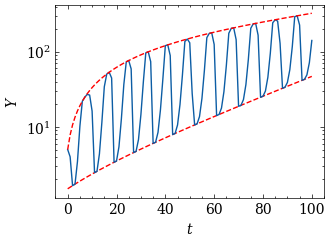

In [9]:
with plt.style.context(["science", "no-latex"]):
    plot_dynamics(b=3.5, c=0.6, g=0.03, d=1.4, m=1.1, I_0=1, c_0=1, Y0=5, Y1=4, t_max=100)
    plt.tight_layout()
    plt.show()